# *`09_ClusteringAlgorithms`*

K-Means is a widely used clustering algorithm. It assigns documents to clusters by minimizing the distance between the document and the cluster's centroid. Each cluster represents a group of similar documents.

* It is an unsupervised learning algorithm.
* It groups the data based on teh proximity or similarity.

**STEPS**
1. Decide the number of clusters, $k = 3$
2. Initialize the centroids : Randomly any 3 points.
3. Assign cluster based on euclidean distance
4. Move the centroids: Mean of all axis
5. Finish: if centroids are same as before then finish.

### How to find the value of $k$?

We can draw the elbow curve for Within Clusters Sum of Squares.
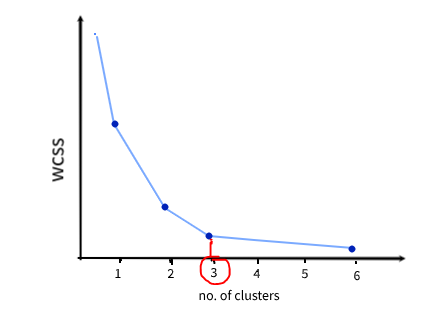


> **Silhouette Score**

* The silhouette score is a metric that measures the quality of clusters created by clustering algorithms. It's used to evaluate how well each data point fits within its assigned cluster compared to other clusters.

* The highest silhouette score indicates the optimal number of clusters. A negative score indicates that the data point is likely assigned to the wrong cluster.

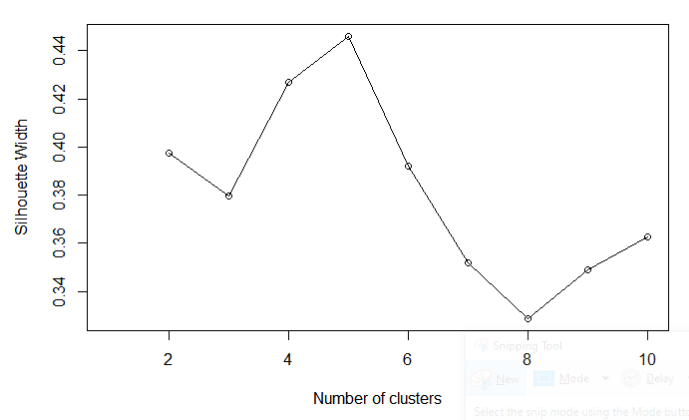

In [24]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [41]:
# Construct the kmeans class from scratch
class KMeansClustering:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters_ = n_clusters
        self.max_iter_ = max_iter
        self.centroids_ = None

    def fit_predict(self, x):
    # Randomly sample the number of clusters. 1. arguement is sample range, 2. is How many samples do i want
        index = random.sample(range(0, x.shape[0]), self.n_clusters_)

        # Assign the randomly selected points as centroids
        self.centroids_ = x[index]

        for _ in range(self.max_iter_):
            # 1. Assign clusters
            cluster_group = self.assign_clusters(x)
            old_centroids = self.centroids_

            # 2. Move centroids to new centroids
            self.centroids_ = self.move_centroids(x, cluster_group)

            # 3. Check finish (if new and old centroids are same)
            if (old_centroids == self.centroids_).all():
                break

        return cluster_group

    # Assign the clusters for each point
    def assign_clusters(self, x):
        cluster_group =[]
        distances =[]

        # Find the distance of each point from the centroid and assign the cluster
        for row in x:
            # For each centroid calculate the distance of each row
            for centroid in self.centroids_:

                # Find the distance of current row with current centroid Using general Euclidean distance
                distances.append(np.sqrt(np.dot((row - centroid), (row - centroid))))

            # Distances will have the distance of row with each centroid
            #print(distances)

            # Find the index position of the minimum distance
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    # Reassign the cluster centroids
    def move_centroids(self, x, cluster_group):
        new_centroids = []

        # Find the number of unique clusters
        cluster_types = np.unique(cluster_group)

        # Run a for loop for no of unique clusters
        for cluster_type in cluster_types:
            # Fetch the rows from x whose cluster type is equal to type and find it mean these will the new centroids
            new_centroids.append(x[cluster_group == cluster_type].mean(axis = 0)) # By keeping axis = 0 you calculate the centroid for both x and y axis

        return np.array(new_centroids)

In [42]:
# Create the data
from sklearn.datasets import make_blobs

centroids = [(-5,5),(5,5)]
cluster_std = [1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=1)

In [43]:
# Run our Kmeans algorithm
kmeans = KMeansClustering(n_clusters = 2, max_iter = 100)
y_cluster = kmeans.fit_predict(X)

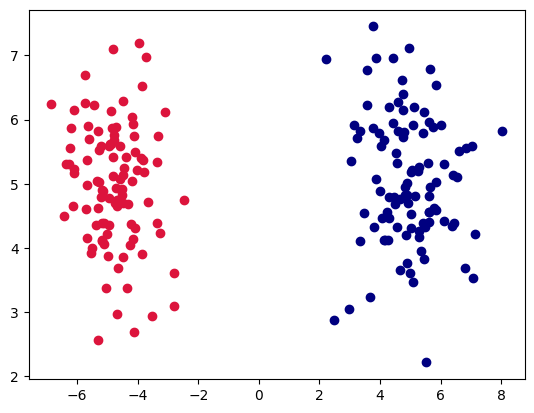

In [45]:
# Plot the clusters
plt.scatter(X[y_cluster == 0,0], X[y_cluster == 0,1], color = 'crimson')
plt.scatter(X[y_cluster == 1,0], X[y_cluster == 1,1], color = 'navy')
plt.show()

**Problems with Kmeans Clustering**

KMeans rely too much on distances. If the data points are grouped using well defined boundaries like below, then Kmeans will work fine.

Below are the cases where Kmeans fails.
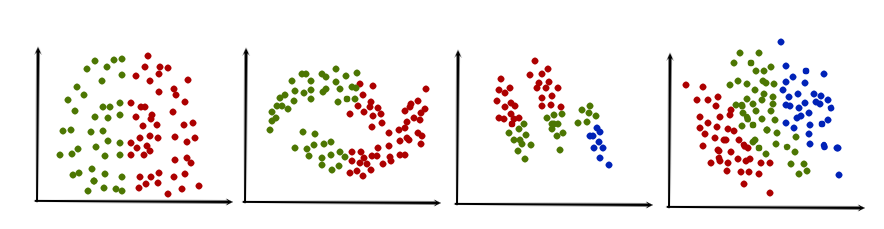<image>

## Hierarchical clustering

Hierarchical clustering is a method of cluster analysis used in data mining and statistics to create a hierarchical representation of clusters within a dataset.

Hierarchical clustering are of 2 types:
1. Agglomerative Clustering
2. Divisive Clustering



### Agglomerative Clustering

Agglomerative clustering is a hierarchical clustering algorithm that uses a bottom-up approach to merge clusters. It is a type of unsupervised machine learning technique that divides a population into clusters.

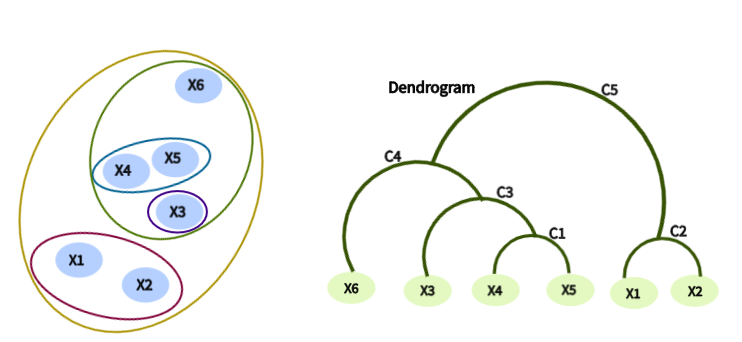


1. Initially, each point is considered as cluster.
2. Then, the points are merged based on the distance. The points that are closed will be merged.
3. The merge is then recorded.
4. We can plot the dendrogram to see the clusters.

**Algorithm For Agglomerative Clustering**

* Initialize the proximity matrix
* Make each point a cluster
* Inside a loop:
  1. Merge the 2 closest clusters
  2. Update the proximity matrix
* Until only one cluster is left.

Find the distance of all the points with every other points

| |p1 | p2 | p3 | p4 | p5 |
|---|---|---|---|---|---|
| p1 | 0 | - | - | - | - |
| p2 | - | 0 | - | - | - |
| p3 | - | - | 0 | - | - |
| p4 | - | - | - | 0 | - |
| p5 | - | - | - | - | 0 |


From scatter of points we can see that $X_3$ and $X_4$ are close to each other so they will be merged and we will call them $C_1$ (cluster 1).


Calculate the distances again and find the closest points.

| |p1 | p2 | c1  | p5 |
|---|---|---|---|---|
| p1 | 0 | - | - | - |  
| p2 | - | 0 | - | - |  
| c1 | - | - | 0 | - |  
| p5 | - | - | - | 0 |

Similarly, the process is continued till only the last cluster is left.

**Tricky Part**
Tricky part is to calculate the distances between clusters. There are several ways to calculate it:

1. Find distance between closest points.

2. Find distance between farthest point.

3. Calculate average and find distance.


#### Types of Agglomerative Clustering
* Min (single link) distance
* Max (complete link) distance
* Average
* WARD

1. **Single link**
It is based on the closest distance between points.

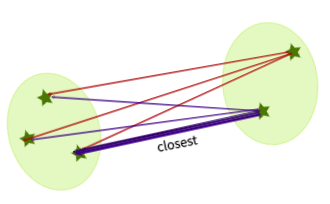


In case of outliers this technique fails. Use this method when there is clear separation and no outliers.

2. **Complete link**

It is based on the farthest distance between points.

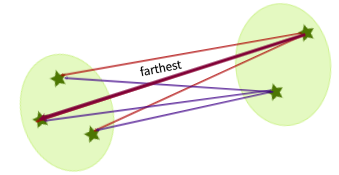

Using this technique helps in controlling the outliers in the data. If you have a huge cluster it will be broken.

3. **Group Average**

It is based on the Average distance between points.

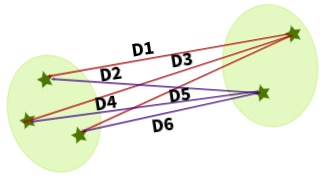

$\frac {d_1 + d_2 + d_3 + d_4 + d_5 + d_6}{2*3}$



4. **WARD**

Ward's linkage is a method for hierarchical cluster analysis. It's also known as minimum variance linkage.

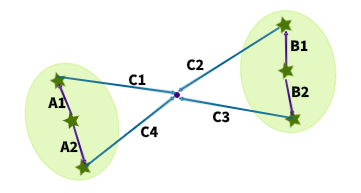

$dist_{A \to B} = C_1{^2} + C_2{^2} + C_3{^2} + C_4{^2} - A_1{^2} - A_2{^2} - B_1{^2} - B_2{^2}$

You minimize the variance.



### Divisive Clustering

Divisive hierarchical clustering is a top-down approach to hierarchical clustering. It's the opposite of agglomerative hierarchical clustering.

In divisive hierarchical clustering, all data points are considered a single cluster. In each iteration, the data points that are not similar are separated from the cluster.

* Here are the steps for divisive clustering:
 1. Consider all data points as a single cluster.
 2. Split into clusters using any flat-clustering method, such as K-Means.
 3. Choose the best cluster to split further, choosing the one with the largest Sum of Squared Error (SSE).

Divisive hierarchical clustering is good at identifying large clusters.

``
Agglomerative is used more than Divisive clustering.
``